<h1><center>Stats and Public Health Deliverable 2</center></h1>
<h4><center>Rafael Almazan | BrainStation</center></h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from statsmodels.regression import linear_model
import statsmodels.api as sm

%matplotlib inline

## Introduction

A basic analysis was conducted of 4 different species of Mosquito in the Chicago area and the prevalence of the West Nile Virus in those populations. These populations are very dense in the summer months of June, July, and August as the traps catch the most number of mosquitos on average during these months. It is also shown that there seems to be some relationship between the Species and the virus prevalence, confirmed by a chi-squared test. Running a Pearson's Correlation test also showed up that our features are statistically correlated to our Mosquito number column, with some being positively correlated and negatively correlated. 

A linear regression to predict the number of mosquitos caught for a specific test. Our final model ended up with an R-squared value of 0.087 which means that our model is able to explain 8.7% of the variance of the population. 

Additionally, a logistic regression was also ran to predict the outcome of eact test (whether the mosquitos were positive for the virus or not). In this, our final model showed an accuracy of 81.34% on a decision threshold of 0.5.


Feature selection was done to eliminate multicolinearity and obtain statistically significant p-values.

## Part 1 - Basic Analysis

To start, we will take a high-level look at the dataset and gain some insight on the nature of the data. This will help us process and analyze the data.

In [2]:
mosquito = pd.read_csv('mosquito_data_part_2.csv')
mosquito.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [3]:
mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [4]:
mosquito.shape

(18495, 12)

In [5]:
mosquito.describe()

,Year,Week,Mosquito number,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,42.017801,-87.531051,10.000000


We see that there are 18495 rows and 12 columns of data in our dataframe. There are no null values.

## 1.1 - Creating dummy variables

Here, we are going to turn the WNV Present column into a binary column. We are also going to expand Trap type into 4 different columns, one for each trap type. These additional columns will also have binary values of ones or zeros, depending on if the trap type was used.

In [6]:
# replacing 'positive' with 1 and 'negative' with 0 in the WNV column
mosquito['WNV Present'] = mosquito['WNV Present'].replace({'positive': 1, 'negative': 0})

In [7]:
# displaying the updated data
mosquito.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


We can see the WNV Present column filled with 1s or 0s instead of 'positive' or 'negative'

In [8]:
# creating dummy variables for each trap type
trap_dummies = pd.get_dummies(mosquito['Trap type'])

# concatenating the trap dummies with the mosquito dataframe, and dropping the Trap type column
mosquito = pd.concat([mosquito, trap_dummies], axis=1).drop('Trap type', axis=1)
mosquito.drop('OVI', axis=1, inplace=True) #drop OVI to avoid overfitting, only one instance of OVI positive so we drop it
mosquito.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0


## 1.2 - Mean mosquito number by month

We will now take a look at the average amount of mosquitos caught by month throughout the year.

In [9]:
# creating a dataframe to look at the average mosquito number every month
monthly_df = mosquito.groupby('Month')['Mosquito number'].mean().reset_index()
monthly_df

,Month,Mosquito number
0,5,2.761905
1,6,10.264442
2,7,11.551879
3,8,12.111321
4,9,8.394973
5,10,5.377778


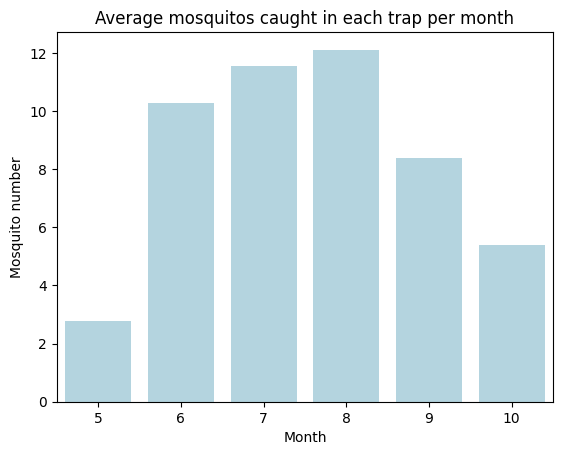

In [10]:
# Plotting each month's average mosquito number on a bar graph
plt.figure()
sns.barplot(x='Month', y='Mosquito number', data=monthly_df, color='lightblue')
plt.title('Average mosquitos caught in each trap per month')


plt.show()

Through the bar plot above, the data shows us that the average number of mosquitos caught per trap changes throughout the year. There is seasonality to the data.

The summer months of June, July, and August see the most mosquitos compared to the rest of the year. This could be due to many different reasons. These months are closely associated with warmer temperatures in Chicago. These environments can make for optimal survival and breeding for mosquitos. The days are also longer and thus mosquitos have more opportunity to stay out in the sun. This increases the chances that they end up in a trap.

## Part 2 - Statistical Analysis

For part 2, we will conduct a number of basic statistical analysis tests to explore the data a little bit further

## 2.1 - Is there a significant difference between the different mosquito species, looking at the occurance of West Nile Virus

To investigate this, we will run a chi-squared test since the presence of WNV is a categorical binary column. Present or Absent.

Hypothesis Test:

<center> $H_0$: There is no relationship between the categorical variables </center>

<center> $\;\; vs \;\;$ </center>

<center>  $H_1$: There is some relationship between the categorical variables </center>

In [11]:
# creating a dataframe with the frequencies of each condition
counts = mosquito.groupby(['WNV Present', 'Species']).size().unstack()
display(counts)

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV Present,,,,
0,4074,9309,215,903
1,1412,2557,11,14


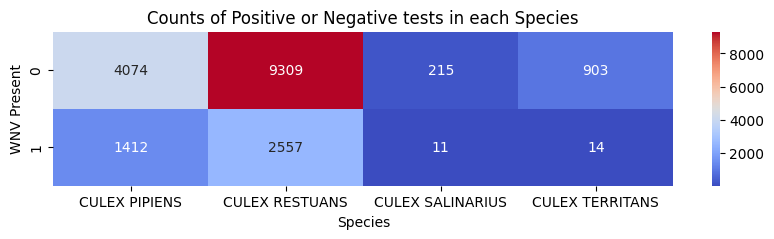

In [12]:
# plotting a heatmap of the dataframe
plt.figure(figsize=(10,2))
sns.heatmap(counts, annot=True, cmap='coolwarm', fmt='g')
plt.title('Counts of Positive or Negative tests in each Species')
plt.show()

In [13]:
stats.chi2_contingency(counts)

Chi2ContingencyResult(statistic=311.10394683130164, pvalue=3.9302341764409087e-67, dof=3, expected_freq=array([[4301.29689105, 9303.5342525 ,  177.19524196,  718.97361449],
       [1184.70310895, 2562.4657475 ,   48.80475804,  198.02638551]]))

With a p-value of 3.9e-67, we are able to reject the null hypothesis that the mosquito species and whether they get the West Nile Virus are independent of each other. There seems to be some relationship between the two variables.



## 2.2 - Correlation with number of mosquitos caught

We will now take a look at the correlation of each column with the number of mosquitos caught to see if there is any relationship

Our Hypothesis is as follows:

<center> $H_0: \rho = 0\;\; vs \;\;  H_1: \rho \neq 0$ </center>

**Null Hypothesis:** There is no correlation between the selected feature and the number of mosquitos caught

**Alternative Hypothesis:** There is some correlation between the selected feature and the number of mosquitos caught

This hypothesis will be tested through a Pearson's R test with the Pearson's correlation coefficient

In [14]:
# taking a look at the correlations of mosquito number, without pearson's test
mosquito.corr()['Mosquito number']

C:\Users\ralmz\AppData\Local\Temp\ipykernel_20192\1505659882.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mosquito.corr()['Mosquito number']


Year               0.129326
Week              -0.033900
Mosquito number    1.000000
WNV Present        0.408034
Lat                0.096820
Lon               -0.151421
Month             -0.040426
CDC                0.094147
GRAVID            -0.138275
SENTINEL           0.108575
Name: Mosquito number, dtype: float64

C:\Users\ralmz\AppData\Local\Temp\ipykernel_20192\991009213.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mosquito.corr(), mask=np.triu(mosquito.corr()), cmap='coolwarm', annot=True)


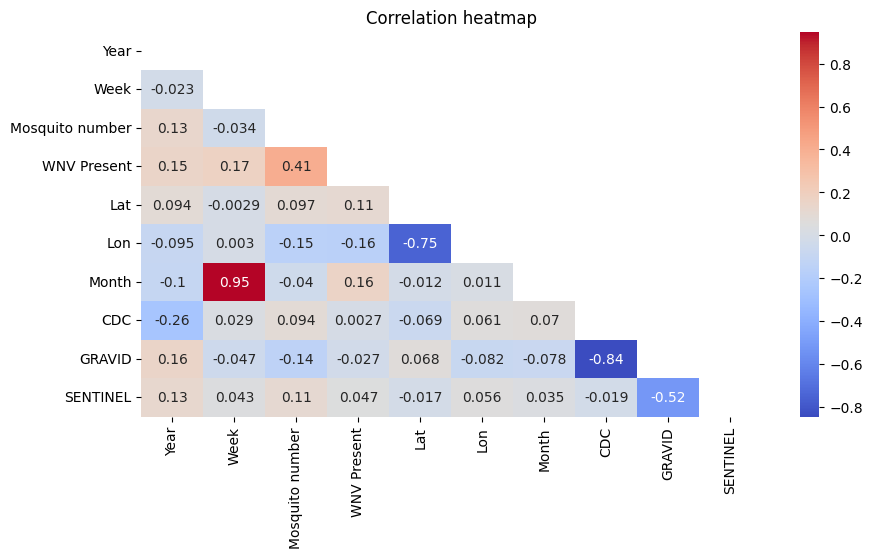

In [15]:
# creating a correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(mosquito.corr(), mask=np.triu(mosquito.corr()), cmap='coolwarm', annot=True)
plt.title('Correlation heatmap')
plt.show()

In [16]:
# Separating every numerical column, to compare with our mosquito number
X = mosquito[['Year', 'Week', 'WNV Present', 'Lat', 'Lon', 'Month', 'CDC', 'GRAVID', 'SENTINEL']]
y = mosquito['Mosquito number']

pearson_results = pd.DataFrame(columns=['statistic', 'pvalue', 'statistically significant'], index=X.columns)

for col in X.columns:
    pearson_corr, pvalue = stats.pearsonr(X[col], y)
    pearson_results.loc[col, 'statistic'] = pearson_corr
    pearson_results.loc[col, 'pvalue'] = pvalue
    pearson_results.loc[col, 'statistically significant'] = (pvalue < 0.05)

display(pearson_results)


,statistic,pvalue,statistically significant
Year,0.129326,0.0,True
Week,-0.0339,0.000004,True
WNV Present,0.408034,0.0,True
Lat,0.09682,0.0,True
Lon,-0.151421,0.0,True
Month,-0.040426,0.0,True
CDC,0.094147,0.0,True
GRAVID,-0.138275,0.0,True
SENTINEL,0.108575,0.0,True


Through the pearson r statistical test, we see that all our columns have statistically significant correlations with mosquito number.

The Year, WNV Presence, Latitude, CDC, and SENTINEL trap types show a positive correlation. The Presence of WNV seems to be the highest correlated column to the mosquito number.

The Week, Month, Longitude, and GRAVID trap type all show a negative correlation. 

These correlations can be visualized in the horizontal bar plot below

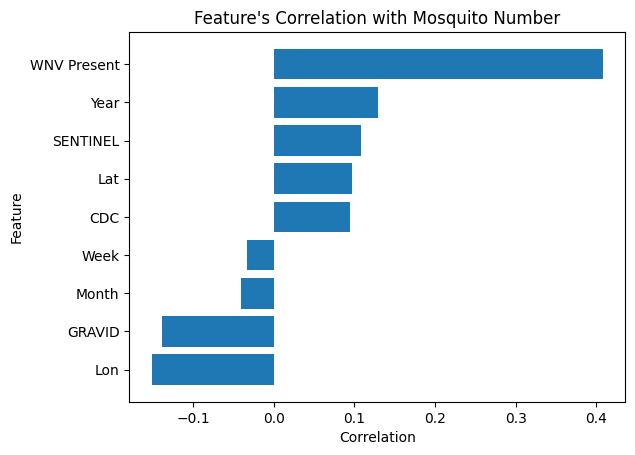

In [17]:
# create horizontal bar plot showing the features correlations with mosquito number
plt.figure()
pearson_results.sort_values(by='statistic', inplace=True)
plt.barh(pearson_results.index, pearson_results['statistic'])
plt.title("Feature's Correlation with Mosquito Number")
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

## Part 3 - Advanced Statistical Analysis

Before we start building our models, we will create dummy variables for the Species as well, to include the species as features in our model. We will remove the *Culex Salinarius* species from our features, following the one-hot encode protocol. We chose to drop this species since it has the least sample size of all the species so we minimize loss of information.

In [18]:
# Taking every column and comparing it with our mosquito number
X = mosquito[['Year', 'Week', 'WNV Present', 'Lat', 'Lon', 'Month', 'CDC', 'GRAVID', 'SENTINEL', 'Species']]

# create dummy variables for our Species
species_dummies = pd.get_dummies(mosquito['Species'])

# concatenating the trap dummies with the mosquito dataframe, and dropping the Trap type column
X = pd.concat([X, species_dummies], axis=1).drop('Species', axis=1)
X.drop('CULEX SALINARIUS', axis=1, inplace=True) 
#drop one, Culex Salinarius, to avoid overfitting, We lose the least info dropping this since least sample size
X.head()

,Year,Week,WNV Present,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,2019,39,0,41.977738,-87.880969,9,0,1,0,0,1,0
1,2019,39,0,41.798211,-87.736925,9,0,1,0,0,1,0
2,2019,39,0,41.987245,-87.689417,9,0,1,0,0,1,0
3,2019,39,0,41.953664,-87.724987,9,0,1,0,0,1,0
4,2019,39,0,41.657069,-87.546049,9,0,1,0,0,1,0


## Linear Regression predicting mosquito number

1. **Linearity**: The relationship between the predictor and target variables to be linear.
2. **Independence/No Multicollinearity**: The predictor variables are independent of each other.
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**

The first assumption has already been addressed above. Through the pearson R test, we have seen statistically significant correlations between the predictor and target variables.

The second assumption will be fulfilled as we build our model and remove features due to multicolinearity in an attempt to minimize overfitting our data.

To create this model, we will drop WNV Present from our features since we wouldn't know it's outcome before we check on the traps, so it would be useless in predicting how many mosquitos we will catch in each test.

In [19]:
# Dropping WNV Present from X variables
Xlin = X.drop('WNV Present', axis=1)

In [20]:
Xlin.head() #checking to see if WNV Present is dropped

,Year,Week,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,2019,39,41.977738,-87.880969,9,0,1,0,0,1,0
1,2019,39,41.798211,-87.736925,9,0,1,0,0,1,0
2,2019,39,41.987245,-87.689417,9,0,1,0,0,1,0
3,2019,39,41.953664,-87.724987,9,0,1,0,0,1,0
4,2019,39,41.657069,-87.546049,9,0,1,0,0,1,0


In [21]:
Xlin.corr()

,Year,Week,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
Year,1.000000,-0.023283,0.093983,-0.094628,-0.100847,-0.261514,0.155283,0.128327,-0.347588,0.343895,0.005373
Week,-0.023283,1.000000,-0.002876,0.002967,0.948940,0.028723,-0.047021,0.043002,0.316788,-0.315605,0.036645
Lat,0.093983,-0.002876,1.000000,-0.749416,-0.011544,-0.068795,0.067916,-0.017184,-0.052372,0.076660,-0.056925
Lon,-0.094628,0.002967,-0.749416,1.000000,0.010695,0.060961,-0.081628,0.055548,0.021916,-0.055278,0.078145
Month,-0.100847,0.948940,-0.011544,0.010695,1.000000,0.070174,-0.078398,0.035333,0.330760,-0.327509,0.032683
CDC,-0.261514,0.028723,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.018611,0.158779,-0.150160,-0.022071
GRAVID,0.155283,-0.047021,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.518582,-0.109750,0.098497,0.028193
SENTINEL,0.128327,0.043002,-0.017184,0.055548,0.035333,-0.018611,-0.518582,1.000000,-0.049268,0.056440,-0.017349
CULEX PIPIENS,-0.347588,0.316788,-0.052372,0.021916,0.330760,0.158779,-0.109750,-0.049268,1.000000,-0.868829,-0.148322
CULEX RESTUANS,0.343895,-0.315605,0.076660,-0.055278,-0.327509,-0.150160,0.098497,0.056440,-0.868829,1.000000,-0.305582


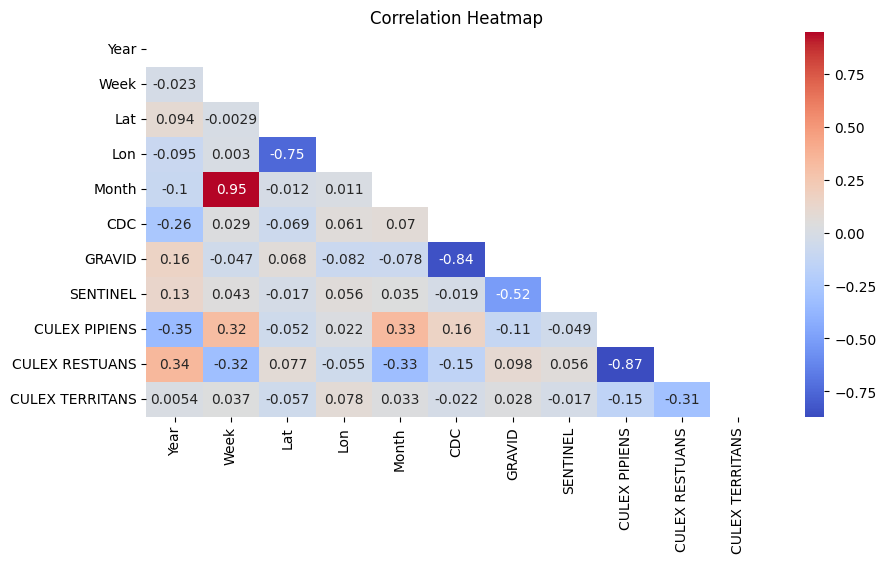

In [22]:
#taking a look at multicolinearity using the same heatmap
plt.figure(figsize=(10,5))
sns.heatmap(Xlin.corr(), mask=np.triu(Xlin.corr()), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

There is strong multicolinearity between Month and Week, lon and lat, *Culex Pipiens* and *Culex Restuans*, as well as CDC and GRAVID types, we will keep this in mind when doing feature selection, dropping them one by one to eliminate multicolinearity

### Top Down Approach

We will start with building a model using all of our features and remove features from the top down, to reduce multicolinearity and complexity while increasing confidence over the real population.

In [23]:
# add constant
Xlin_const1 = sm.add_constant(Xlin)
Xlin_const1.head()

,const,Year,Week,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,39,41.977738,-87.880969,9,0,1,0,0,1,0
1,1.0,2019,39,41.798211,-87.736925,9,0,1,0,0,1,0
2,1.0,2019,39,41.987245,-87.689417,9,0,1,0,0,1,0
3,1.0,2019,39,41.953664,-87.724987,9,0,1,0,0,1,0
4,1.0,2019,39,41.657069,-87.546049,9,0,1,0,0,1,0


In [24]:
# first model with everything
linreg1 = linear_model.OLS(y, Xlin_const1).fit()
linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        22:00:27   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18483   BIC:                         1.470e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3023.3656    112.167    -26.954      0.000   -3243.223   -2803.508
Year                0.5333      0.029     18.425      0.000       0.477       0.590
Week               -0.0762      0.072     -1.065      0.287      -0.216       0.064
Lat                -4.8662      1.239     -3.928      0.000      -7.294      -2.438
Lon               -24.5167      1.503    -16.314      0.000     -27.462     -21.571
Month              -0.3356      0.311     -1.080      0.280      -0.945       0.273
CDC                20.9748     12.855      1.632      0.103      -4.222      46.171
GRAVID              9.9813     12.844      0.777      0.437     -15.195      35.157
SENTINEL           23.0377     12.878      1.789      0.074      -2.205      48.280
CULEX PIPIENS       9.7623      0.874     11.172      0.000       8.050      11.475
CULEX RESTUANS      8.5056      0.867      9.805      0.000       6.805      10.206
CULEX TERRITANS     0.4680      0.958      0.489      0.625      -1.409       2.345
==============================================================================
Omnibus:                     4534.845   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8986.296
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     2.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This will be our baseline model, including all our features. We see a R-squared value of 0.093 which means that our model is able to explain about 9.3% of the variance of the true population. However, our model right now is very complex and not easy to interpret. We will undergo feature selection to decrease complexity and overfitting while increasing interpretability and simplicity

If we recall from earlier, Month and Week were very highly correlated. To stay consistent with our analysis above in 2.1, we will keep the month feature in our model and drop Week.

In [25]:
# fitting the linear regression to our columns without the Month trap type
Xlin_const2 = Xlin_const1.drop('Week', axis=1)
linreg2 = linear_model.OLS(y,Xlin_const2).fit()
display(Xlin_const2.head())
display(linreg2.summary())

,const,Year,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,41.977738,-87.880969,9,0,1,0,0,1,0
1,1.0,2019,41.798211,-87.736925,9,0,1,0,0,1,0
2,1.0,2019,41.987245,-87.689417,9,0,1,0,0,1,0
3,1.0,2019,41.953664,-87.724987,9,0,1,0,0,1,0
4,1.0,2019,41.657069,-87.546049,9,0,1,0,0,1,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        22:00:27   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18484   BIC:                         1.470e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3009.5675    111.416    -27.012      0.000   -3227.953   -2791.182
Year                0.5263      0.028     18.674      0.000       0.471       0.582
Lat                -4.8771      1.239     -3.937      0.000      -7.305      -2.449
Lon               -24.5269      1.503    -16.321      0.000     -27.472     -21.581
Month              -0.6484      0.101     -6.428      0.000      -0.846      -0.451
CDC                20.9410     12.855      1.629      0.103      -4.256      46.137
GRAVID              9.9029     12.844      0.771      0.441     -15.273      35.079
SENTINEL           22.9564     12.878      1.783      0.075      -2.286      48.198
CULEX PIPIENS       9.7560      0.874     11.165      0.000       8.043      11.469
CULEX RESTUANS      8.5264      0.867      9.832      0.000       6.826      10.226
CULEX TERRITANS     0.4728      0.958      0.494      0.621      -1.404       2.350
==============================================================================
Omnibus:                     4535.908   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8990.208
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     2.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that when we remove our Week feature, our R-squared value decreases to 0.092. Although this means that we are able to represent less of our true population with this model, the 0.1% change in representation will also reduce multicolinearity in our model. As mentioned above, this removal of multicolinearity will increase the precision of our model, increasing our statistical confidence in our regression. Unless this removal of features greatly affects our model, it is best to have no multicolinearity in our model.

By this same logic, we will start to further eliminate multicolinearity in our model by removing features one by one. We know that the GRAVID and CDC trap types are also very highly correlated. GRAVID has a higher p-value, so we will remove it from our features. We will also be removing our Latitude column followed by the *Culex Pipiens* column because these also exhibit colinearity with other features

In [26]:
# removing GRAVID from our features
Xlin_const3 = Xlin_const2.drop('GRAVID', axis=1)
linreg3 = linear_model.OLS(y,Xlin_const3).fit()
display(Xlin_const3.head())
display(linreg3.summary())

,const,Year,Lat,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,41.977738,-87.880969,9,0,0,0,1,0
1,1.0,2019,41.798211,-87.736925,9,0,0,0,1,0
2,1.0,2019,41.987245,-87.689417,9,0,0,0,1,0
3,1.0,2019,41.953664,-87.724987,9,0,0,0,1,0
4,1.0,2019,41.657069,-87.546049,9,0,0,0,1,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        22:00:27   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18485   BIC:                         1.470e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2999.6761    110.674    -27.104      0.000   -3216.607   -2782.746
Year                0.5265      0.028     18.683      0.000       0.471       0.582
Lat                -4.8754      1.239     -3.936      0.000      -7.304      -2.447
Lon               -24.5215      1.503    -16.318      0.000     -27.467     -21.576
Month              -0.6471      0.101     -6.416      0.000      -0.845      -0.449
CDC                11.0401      0.582     18.979      0.000       9.900      12.180
SENTINEL           13.0520      0.905     14.422      0.000      11.278      14.826
CULEX PIPIENS       9.7534      0.874     11.163      0.000       8.041      11.466
CULEX RESTUANS      8.5261      0.867      9.831      0.000       6.826      10.226
CULEX TERRITANS     0.4720      0.957      0.493      0.622      -1.405       2.349
==============================================================================
Omnibus:                     4536.056   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8990.652
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     2.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In removing GRAVID, we reduced the p-values for other features as well as maintained the same R-squared value


In [27]:
# removing Latitude from our features
Xlin_const4 = Xlin_const3.drop('Lat', axis=1)
linreg4 = linear_model.OLS(y,Xlin_const4).fit()
display(Xlin_const4.head())
display(linreg4.summary())

,const,Year,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,-87.880969,9,0,0,0,1,0
1,1.0,2019,-87.736925,9,0,0,0,1,0
2,1.0,2019,-87.689417,9,0,0,0,1,0
3,1.0,2019,-87.724987,9,0,0,0,1,0
4,1.0,2019,-87.546049,9,0,0,0,1,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        22:00:27   Log-Likelihood:                -73456.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18486   BIC:                         1.470e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2815.2759    100.306    -28.067      0.000   -3011.884   -2618.667
Year                0.5259      0.028     18.653      0.000       0.471       0.581
Lon               -20.1084      1.001    -20.091      0.000     -22.070     -18.147
Month              -0.6522      0.101     -6.464      0.000      -0.850      -0.454
CDC                11.0949      0.582     19.071      0.000       9.955      12.235
SENTINEL           12.9384      0.905     14.298      0.000      11.165      14.712
CULEX PIPIENS       9.7503      0.874     11.155      0.000       8.037      11.464
CULEX RESTUANS      8.4798      0.867      9.775      0.000       6.779      10.180
CULEX TERRITANS     0.4366      0.958      0.456      0.648      -1.441       2.314
==============================================================================
Omnibus:                     4526.708   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8955.519
Skew:                           1.502   Prob(JB):                         0.00
Kurtosis:                       4.610   Cond. No.                     2.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We also maintained the same R-squared value when we removed Latitude from our model.

To enhance the simplicity of our model and to eliminate the last remaining factor contributing to multicollinearity, we will remove the *Culex Restuans* species feature. This step will allow for a more accurate interpretation of the effects of other independent variables on the outcome variable.

In [28]:
# removing Culex Pipiens from our features
Xlin_const_final = Xlin_const4.drop(['CULEX RESTUANS'], axis=1)
linreg_final = linear_model.OLS(y,Xlin_const_final).fit()
display(Xlin_const_final.head())
display(linreg_final.summary())

,const,Year,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX TERRITANS
0,1.0,2019,-87.880969,9,0,0,0,0
1,1.0,2019,-87.736925,9,0,0,0,0
2,1.0,2019,-87.689417,9,0,0,0,0
3,1.0,2019,-87.724987,9,0,0,0,0
4,1.0,2019,-87.546049,9,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     251.6
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        22:00:27   Log-Likelihood:                -73504.
No. Observations:               18495   AIC:                         1.470e+05
Df Residuals:                   18487   BIC:                         1.471e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2849.0740    100.502    -28.348      0.000   -3046.067   -2652.080
Year                0.5510      0.028     19.575      0.000       0.496       0.606
Lon               -20.0135      1.003    -19.946      0.000     -21.980     -18.047
Month              -0.6712      0.101     -6.636      0.000      -0.869      -0.473
CDC                10.9259      0.583     18.741      0.000       9.783      12.069
SENTINEL           12.9458      0.907     14.270      0.000      11.168      14.724
CULEX PIPIENS       1.5252      0.237      6.426      0.000       1.060       1.990
CULEX TERRITANS    -7.8602      0.445    -17.664      0.000      -8.732      -6.988
==============================================================================
Omnibus:                     4546.262   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9015.491
Skew:                           1.508   Prob(JB):                         0.00
Kurtosis:                       4.615   Cond. No.                     2.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By removing these features, we eliminated multicollinearity and simplified our model. The final model has an R-squared value of 0.087, which is lower than the original value of 0.093. However, this reduction in R-squared is a reasonable tradeoff for the improved simplicity and the elimination of multicollinearity. This is the proportion of the true variance of Mosquito number that can be explained by our features in our model. We are able to explain 8.7% of the variance of our true population.

Next, we will take a look at the distribution of the residuals as well as Homoscedasticity and confirm the final assumptions of a linear regression

In [29]:
# looking at the final features of our final model
Xlin_const_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            18495 non-null  float64
 1   Year             18495 non-null  int64  
 2   Lon              18495 non-null  float64
 3   Month            18495 non-null  int64  
 4   CDC              18495 non-null  uint8  
 5   SENTINEL         18495 non-null  uint8  
 6   CULEX PIPIENS    18495 non-null  uint8  
 7   CULEX TERRITANS  18495 non-null  uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 650.3 KB


### Residuals:

Are the residuals normally distributed?

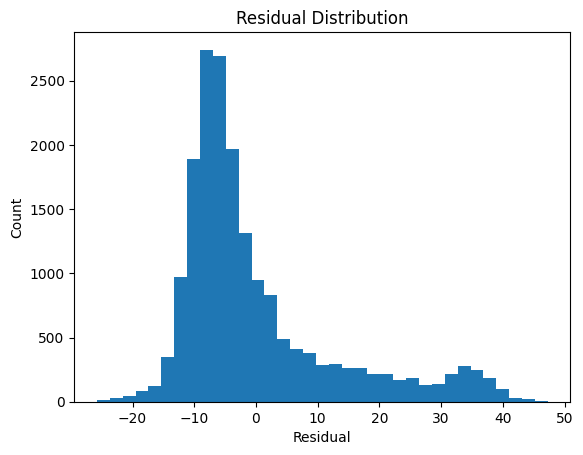

Shapiro-Wilk: ShapiroResult(statistic=0.8251338005065918, pvalue=0.0)


C:\Users\ralmz\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [30]:
# creating a histogram of the residuals from our final linear regression model.
plt.figure()
plt.hist(linreg_final.resid, bins=35)
plt.title('Residual Distribution')
plt.ylabel('Count')
plt.xlabel('Residual')
plt.show()

# checking if residuals are normally distributed through the Shapiro-Wilk test
# hard to use since our sample size is large
print('Shapiro-Wilk:', stats.shapiro(linreg_final.resid))

Above, we plot our residuals on a histogram to check it's distribution. One of the Assumptions of a linear regression model is that the residuals follow a normal distribution. In our model above, we see a right-skewed distribution of our model's residuals. The distribution also show the possibility of two peaks with a small one around residual=35. We also use a Shapiro-Wilk statistical test to check for normality of the residuals. However, since the Shapiro-Wilk test assumes a smaller sample size, it does not give us an accurate test p-value and we are unable to conclude that this distribution is a normal distribution.

Because of this, we will also plot our residuals on a Q-Q plot:

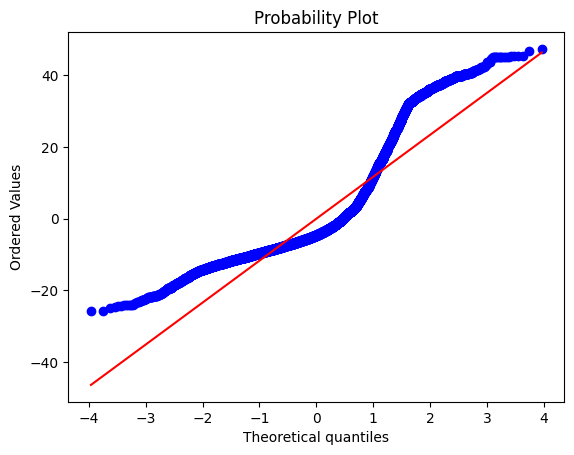

In [31]:
# plotting on Q-Q plot
plt.figure()
stats.probplot(linreg_final.resid, dist="norm", plot = plt);
plt.show()

Based on the Q-Q plot above, we see that there is alot of deviation and therefore the residuals are not normally distributed. This confirms what is seen with the histogram as we saw a right-skewed distribution of the residuals. Therefore, this model does not pass the third assumption of residual normality.

### Homoscedasticity:

Does the residual variance change?

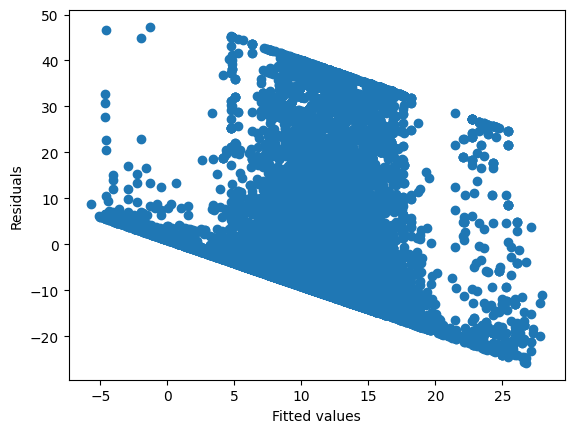

In [32]:
# looking at the residuals homoscedasticity
plt.figure()
plt.scatter(linreg_final.fittedvalues, linreg_final.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

We can see that there is no change in the variance of our residuals. This means that our model passes the fourth assumption of linear regression.


## Logistic Regression predicting West Nile Virus prevalence

To start, we will again prepare our data for the Logistic Regression

In [33]:
# Taking every column and comparing it with our mosquito number
Xlog = mosquito[['Year', 'Week', 'Mosquito number', 'Lat', 'Lon', 'Month', 'CDC', 'GRAVID', 'SENTINEL', 'Species']]
ylog = mosquito['WNV Present']

# create dummy variables for our Species
species_dummies = pd.get_dummies(Xlog['Species'])

# concatenating the trap dummies with the mosquito dataframe, and dropping the Trap type column
Xlog = pd.concat([Xlog, species_dummies], axis=1).drop('Species', axis=1)
Xlog.drop('CULEX SALINARIUS', axis=1, inplace=True) 
#drop one, Culex Salinarius, to avoid overfitting, We lose the least info dropping this since least sample size
Xlog.head()

,Year,Week,Mosquito number,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,0,1,0,0,1,0
1,2019,39,1,41.798211,-87.736925,9,0,1,0,0,1,0
2,2019,39,2,41.987245,-87.689417,9,0,1,0,0,1,0
3,2019,39,1,41.953664,-87.724987,9,0,1,0,0,1,0
4,2019,39,9,41.657069,-87.546049,9,0,1,0,0,1,0


To start, we will first build our base model with all our features present. this will be very complex and will likely end up not being our final model

In [34]:
# building logistic regression model to predict WNV Present, using all available features.
Xlog_const1 = sm.add_constant(Xlog)
logreg1 = sm.Logit(ylog, Xlog_const1).fit()
display(Xlog_const1.head()) # displaying our independent variables
display(logreg1.summary())

# obtaining our model's accuracy
logreg1_pred = logreg1.predict(Xlog_const1)
accuracy = np.mean((logreg1_pred >= 0.5) == ylog)*100

# printing our model's accuray
print(f'Model accuracy: {accuracy.round(2)}%')

         Current function value: 0.405443
         Iterations: 35


C:\Users\ralmz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,const,Year,Week,Mosquito number,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,39,2,41.977738,-87.880969,9,0,1,0,0,1,0
1,1.0,2019,39,1,41.798211,-87.736925,9,0,1,0,0,1,0
2,1.0,2019,39,2,41.987245,-87.689417,9,0,1,0,0,1,0
3,1.0,2019,39,1,41.953664,-87.724987,9,0,1,0,0,1,0
4,1.0,2019,39,9,41.657069,-87.546049,9,0,1,0,0,1,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18482
Method:                           MLE   Df Model:                           12
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2229
Time:                        22:00:28   Log-Likelihood:                -7498.7
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -532.6243   7090.927     -0.075      0.940   -1.44e+04    1.34e+04
Year                0.1130      0.007     16.467      0.000       0.100       0.126
Week                0.1002      0.016      6.243      0.000       0.069       0.132
Mosquito number     0.0651      0.001     44.694      0.000       0.062       0.068
Lat                -0.6595      0.287     -2.301      0.021      -1.221      -0.098
Lon                -3.5432      0.335    -10.580      0.000      -4.200      -2.887
Month               0.2202      0.069      3.192      0.001       0.085       0.355
CDC                13.8542   7090.882      0.002      0.998   -1.39e+04    1.39e+04
GRAVID             14.0099   7090.882      0.002      0.998   -1.39e+04    1.39e+04
SENTINEL           13.6159   7090.882      0.002      0.998   -1.39e+04    1.39e+04
CULEX PIPIENS       0.9952      0.322      3.088      0.002       0.364       1.627
CULEX RESTUANS      0.7450      0.322      2.316      0.021       0.115       1.375
CULEX TERRITANS    -1.4949      0.420     -3.563      0.000      -2.317      -0.673
===================================================================================
"""

Model accuracy: 81.11%


The maximum number of iterations to fit a good sigmoid plot was hit. This means that the Logit function was not able to find the true optimal set of coefficients for the model and optimization did not occur. One reason for this is that the model may be overfitting the data due to many different features and multicolinearity between features. To facilitate better optimization of the logistic regression model, we will undergo feature selection and tune our model

We will take a look at the correlations of our independent variables to check for multicolinearity

<AxesSubplot: >

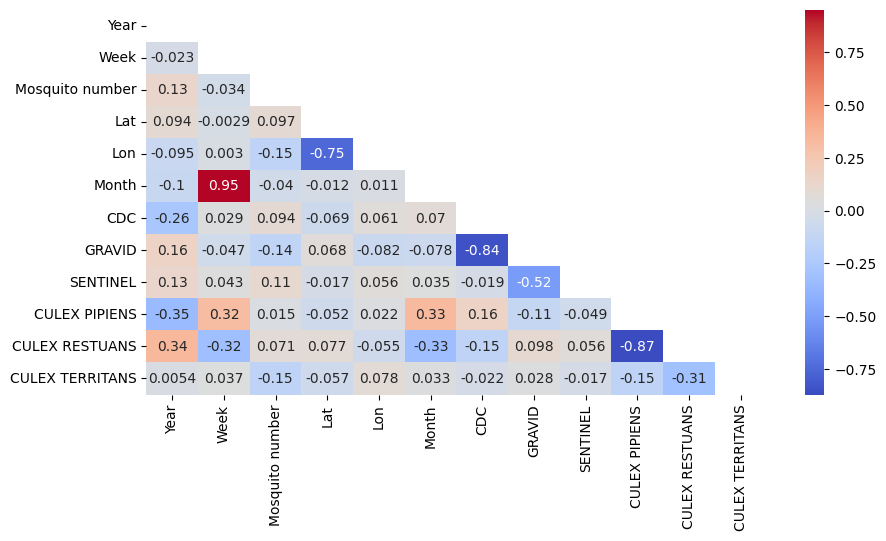

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(Xlog.corr(), mask=np.triu(Xlog.corr()), cmap='coolwarm', annot=True)

We see that there is multicolinearity in our independent variables. We will start to eliminate these one by one in the coming models and will continuously assess performance.

As seen in the correlation matrix above, we can remove our Week feature since it is very highly correlated to our Month feature. We will keep Month to stay consistent with our analysis above.

In [36]:
# removing the Month feature
Xlog_const2 = Xlog_const1.drop('Week', axis=1)
logreg2 = sm.Logit(ylog, Xlog_const2).fit()
display(Xlog_const2.head()) # displaying our independent variables
display(logreg2.summary())

# obtaining our model's accuracy
logreg2_pred = logreg2.predict(Xlog_const2)
accuracy = np.mean((logreg2_pred >= 0.5) == ylog)*100

# printing our model's accuray
print(f'Model accuracy: {accuracy.round(2)}%')

         Current function value: 0.406504
         Iterations: 35


C:\Users\ralmz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,const,Year,Mosquito number,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,2,41.977738,-87.880969,9,0,1,0,0,1,0
1,1.0,2019,1,41.798211,-87.736925,9,0,1,0,0,1,0
2,1.0,2019,2,41.987245,-87.689417,9,0,1,0,0,1,0
3,1.0,2019,1,41.953664,-87.724987,9,0,1,0,0,1,0
4,1.0,2019,9,41.657069,-87.546049,9,0,1,0,0,1,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18483
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2209
Time:                        22:00:28   Log-Likelihood:                -7518.3
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -547.4290   7134.312     -0.077      0.939   -1.45e+04    1.34e+04
Year                0.1214      0.007     18.082      0.000       0.108       0.135
Mosquito number     0.0646      0.001     44.564      0.000       0.062       0.067
Lat                -0.6446      0.286     -2.254      0.024      -1.205      -0.084
Lon                -3.5122      0.335    -10.498      0.000      -4.168      -2.856
Month               0.6246      0.024     25.739      0.000       0.577       0.672
CDC                13.9595   7134.268      0.002      0.998    -1.4e+04     1.4e+04
GRAVID             14.1553   7134.268      0.002      0.998    -1.4e+04     1.4e+04
SENTINEL           13.7768   7134.268      0.002      0.998    -1.4e+04     1.4e+04
CULEX PIPIENS       1.0149      0.323      3.145      0.002       0.382       1.647
CULEX RESTUANS      0.7272      0.322      2.258      0.024       0.096       1.359
CULEX TERRITANS    -1.4929      0.420     -3.556      0.000      -2.316      -0.670
===================================================================================
"""

Model accuracy: 81.32%


In removing Week, we are able to increase our model accuracy to about 81.32%. However, our model is still unable to optimize a sigmoid curve fit. This suggests that there may still be multicolinearity in our model.

We can see that our three traps have a very high p-value. This means that these features are likely not statistically significant in predicting our target variable (WNV Presence). From our correlation matrix above, we also see that the GRAVID and CDC trap types show high colinearity and it may be smart to remove one of those features. We will first remove the GRAVID trap type to stay consistent with our linear regression model above.

In [37]:
# removing the GRAVID trap type
Xlog_const3 = Xlog_const2.drop('GRAVID', axis=1)
logreg3 = sm.Logit(ylog, Xlog_const3).fit()
display(Xlog_const3.head()) # displaying our independent variables
display(logreg3.summary())

# obtaining our model's accuracy
logreg3_pred = logreg3.predict(Xlog_const3)
accuracy = np.mean((logreg3_pred >= 0.5) == ylog)*100

# printing our model's accuray
print(f'Model accuracy: {accuracy.round(2)}%')

Optimization terminated successfully.
         Current function value: 0.406506
         Iterations 8


,const,Year,Mosquito number,Lat,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,2,41.977738,-87.880969,9,0,0,0,1,0
1,1.0,2019,1,41.798211,-87.736925,9,0,0,0,1,0
2,1.0,2019,2,41.987245,-87.689417,9,0,0,0,1,0
3,1.0,2019,1,41.953664,-87.724987,9,0,0,0,1,0
4,1.0,2019,9,41.657069,-87.546049,9,0,0,0,1,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2209
Time:                        22:00:28   Log-Likelihood:                -7518.3
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -533.2807     25.095    -21.250      0.000    -582.467    -484.095
Year                0.1214      0.007     18.083      0.000       0.108       0.135
Mosquito number     0.0646      0.001     44.565      0.000       0.062       0.067
Lat                -0.6446      0.286     -2.253      0.024      -1.205      -0.084
Lon                -3.5121      0.335    -10.498      0.000      -4.168      -2.856
Month               0.6247      0.024     25.742      0.000       0.577       0.672
CDC                -0.1958      0.131     -1.498      0.134      -0.452       0.060
SENTINEL           -0.3785      0.171     -2.219      0.027      -0.713      -0.044
CULEX PIPIENS       1.0148      0.323      3.145      0.002       0.382       1.647
CULEX RESTUANS      0.7272      0.322      2.258      0.024       0.096       1.359
CULEX TERRITANS    -1.4929      0.420     -3.556      0.000      -2.316      -0.670
===================================================================================
"""

Model accuracy: 81.32%


Here, we see that our optimization for the best fitting sigmoid curve is successful. It is very important to have an optimized sigmoid curve because this is used to model the relationship between the independent and dependent variables. The sigmoid curve helps us use our features to predict the probablity of our target variable being True. It helps us find the best set of coefficients for our independent variables. This gives us more confidence that we have the best-fitting sigmoid curve for our predictions.

Eliminating multicolinearity from our model by removing the GRAVID trap type also lowerd our p-values for the remaining trap types. Our Model accuracy also stayed the same at 81.32%

However, there is still some colinearity in our model, being the Latitude and Longitude features. We will now take a look at what happens to our model when we drop one of these features. We will drop the Latitude feature since it has a slightly higher p-value than the Longitude feature.

In [38]:
# removing Latutide from our features
Xlog_const4 = Xlog_const3.drop(['Lat'], axis=1)
logreg4 = sm.Logit(ylog, Xlog_const4).fit()
display(Xlog_const4.head()) # displaying our independent variables
display(logreg4.summary())

# obtaining our model's accuracy
logreg4_pred = logreg4.predict(Xlog_const4)
accuracy = np.mean((logreg4_pred >= 0.5) == ylog)*100

# printing our model's accuray
print(f'Model accuracy: {accuracy.round(2)}%')

Optimization terminated successfully.
         Current function value: 0.406643
         Iterations 8


,const,Year,Mosquito number,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,2,-87.880969,9,0,0,0,1,0
1,1.0,2019,1,-87.736925,9,0,0,0,1,0
2,1.0,2019,2,-87.689417,9,0,0,0,1,0
3,1.0,2019,1,-87.724987,9,0,0,0,1,0
4,1.0,2019,9,-87.546049,9,0,0,0,1,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2206
Time:                        22:00:28   Log-Likelihood:                -7520.9
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -509.4087     22.718    -22.423      0.000    -553.935    -464.882
Year                0.1213      0.007     18.071      0.000       0.108       0.134
Mosquito number     0.0647      0.001     44.576      0.000       0.062       0.068
Lon                -2.9344      0.214    -13.702      0.000      -3.354      -2.515
Month               0.6237      0.024     25.710      0.000       0.576       0.671
CDC                -0.1809      0.130     -1.390      0.165      -0.436       0.074
SENTINEL           -0.3935      0.170     -2.311      0.021      -0.727      -0.060
CULEX PIPIENS       1.0102      0.323      3.132      0.002       0.378       1.642
CULEX RESTUANS      0.7184      0.322      2.232      0.026       0.087       1.349
CULEX TERRITANS    -1.5024      0.420     -3.580      0.000      -2.325      -0.680
===================================================================================
"""

Model accuracy: 81.32%


After removing the Latitude feature from our model, we see that our model's accuracy is maintained at around 81.32%. However, we can still improve our model by removing multicolinearity of the *Culex Pipiens* and *Culex Restuans* mosquito species. We will remove the *Culex Restuans* from our model since it has a lower p-value.

In [39]:
# removing Culex Restuans from our features
Xlog_const5 = Xlog_const4.drop(['CULEX RESTUANS'], axis=1)
logreg5 = sm.Logit(ylog, Xlog_const5).fit()
display(Xlog_const5.head()) # displaying our independent variables
display(logreg5.summary())

# obtaining our model's accuracy
logreg5_pred = logreg5.predict(Xlog_const5)
accuracy = np.mean((logreg5_pred >= 0.5) == ylog)*100

# printing our model's accuray
print(f'Model accuracy: {accuracy.round(2)}%')

Optimization terminated successfully.
         Current function value: 0.406806
         Iterations 8


,const,Year,Mosquito number,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX TERRITANS
0,1.0,2019,2,-87.880969,9,0,0,0,0
1,1.0,2019,1,-87.736925,9,0,0,0,0
2,1.0,2019,2,-87.689417,9,0,0,0,0
3,1.0,2019,1,-87.724987,9,0,0,0,0
4,1.0,2019,9,-87.546049,9,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18486
Method:                           MLE   Df Model:                            8
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2203
Time:                        22:00:28   Log-Likelihood:                -7523.9
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -509.6846     22.703    -22.450      0.000    -554.182    -465.187
Year                0.1223      0.007     18.253      0.000       0.109       0.135
Mosquito number     0.0649      0.001     44.824      0.000       0.062       0.068
Lon                -2.9229      0.214    -13.659      0.000      -3.342      -2.504
Month               0.6234      0.024     25.691      0.000       0.576       0.671
CDC                -0.1893      0.130     -1.456      0.145      -0.444       0.065
SENTINEL           -0.3995      0.170     -2.343      0.019      -0.734      -0.065
CULEX PIPIENS       0.3021      0.051      5.949      0.000       0.203       0.402
CULEX TERRITANS    -2.2110      0.273     -8.096      0.000      -2.746      -1.676
===================================================================================
"""

Model accuracy: 81.31%


In removing the *Culex Restuans* species from our features, we are able to reduce multicolinearity and avoid overfitting our model. This comes at a price since our accuracy decreased by 0.01%. However, the benefits of this tradeoff outweighs the costs as we have a higher confidence that our model is not overfitting the data, at the price of losing 0.01% accuracy, which is not much.

We can achieve further simplification in our model by experimenting with the removal of the CDC trap feature from our independent variables, to determine how this impacts the model's performance and complexity. The decision to eliminate the CDC trap feature is based on its high P-value in the logistic regression, indicating its insignificance in predicting the outcome variable.

In [40]:
# removing the CDC trap type from our features
Xlog_const_final = Xlog_const5.drop(['CDC'], axis=1)
logreg_final = sm.Logit(ylog, Xlog_const_final).fit()
display(Xlog_const_final.head()) # displaying our independent variables
display(logreg_final.summary())

# obtaining our model's accuracy
logreg_final_pred = logreg_final.predict(Xlog_const_final)
accuracy = np.mean((logreg_final_pred >= 0.5) == ylog)*100

# printing our model's accuray
print(f'Model accuracy: {accuracy.round(2)}%')

Optimization terminated successfully.
         Current function value: 0.406864
         Iterations 8


,const,Year,Mosquito number,Lon,Month,SENTINEL,CULEX PIPIENS,CULEX TERRITANS
0,1.0,2019,2,-87.880969,9,0,0,0
1,1.0,2019,1,-87.736925,9,0,0,0
2,1.0,2019,2,-87.689417,9,0,0,0
3,1.0,2019,1,-87.724987,9,0,0,0
4,1.0,2019,9,-87.546049,9,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18487
Method:                           MLE   Df Model:                            7
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2202
Time:                        22:00:29   Log-Likelihood:                -7525.0
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -517.6774     22.056    -23.471      0.000    -560.907    -474.448
Year                0.1248      0.006     19.243      0.000       0.112       0.138
Mosquito number     0.0645      0.001     45.385      0.000       0.062       0.067
Lon                -2.9566      0.213    -13.902      0.000      -3.373      -2.540
Month               0.6217      0.024     25.660      0.000       0.574       0.669
SENTINEL           -0.3964      0.170     -2.329      0.020      -0.730      -0.063
CULEX PIPIENS       0.2979      0.051      5.873      0.000       0.199       0.397
CULEX TERRITANS    -2.2130      0.273     -8.103      0.000      -2.748      -1.678
===================================================================================
"""

Model accuracy: 81.34%


This will be our final model for our logistic regression predicting the presence of the West Nile Virus. We have chosen a Decision threshold of 0.5 because we want to account for a balance of both false positives and false negatives. If we were to alter the threshold, we would run the risk of labeling low risk populations as high risk or vice versa, which we don't want to see.

### Odds Ratios

We will examine the Odds Ratios to determine how each feature in our model affects the odds of a positive West Nile Virus test result.

In [41]:
# obtain logistic regression coefficients
logreg_final.params

const             -517.677390
Year                 0.124800
Mosquito number      0.064522
Lon                 -2.956635
Month                0.621688
SENTINEL            -0.396353
CULEX PIPIENS        0.297934
CULEX TERRITANS     -2.213027
dtype: float64

In [42]:
# create a dataframe showing both the coefficients and odds ratios
logreg_oddsratio_df = pd.DataFrame(logreg_final.params, columns=['Coefficient'])
logreg_oddsratio_df['Odds ratio'] = np.exp(logreg_oddsratio_df['Coefficient']).round(2)
logreg_oddsratio_df

,Coefficient,Odds ratio
const,-517.677390,0.00
Year,0.124800,1.13
Mosquito number,0.064522,1.07
Lon,-2.956635,0.05
Month,0.621688,1.86
SENTINEL,-0.396353,0.67
CULEX PIPIENS,0.297934,1.35
CULEX TERRITANS,-2.213027,0.11


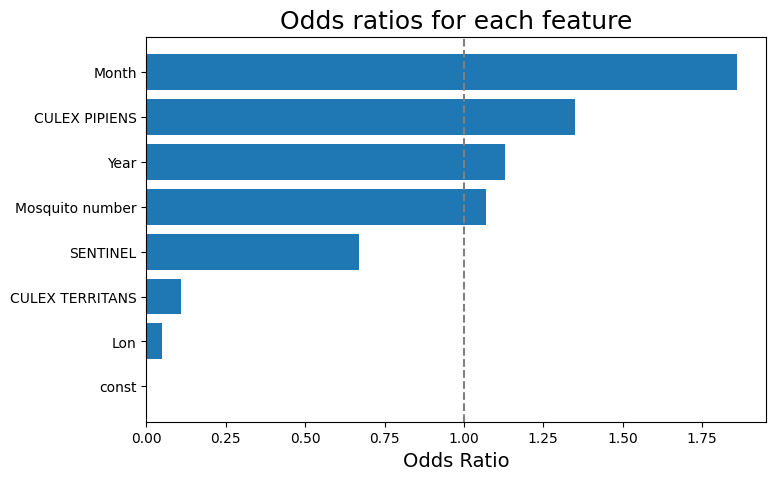

In [43]:
# plotting the odds ratios of each feature
plt.figure(figsize=(8,5))
logreg_oddsratio_df.sort_values(by='Odds ratio', inplace=True)
plt.barh(logreg_oddsratio_df.index, logreg_oddsratio_df["Odds ratio"])
plt.title("Odds ratios for each feature", fontsize=18)
plt.xlabel("Odds Ratio", fontsize=14)
plt.axvline(x=1, linestyle='--', color='gray')
plt.tight_layout
plt.show()

The odds ratio is a measure that informs us about the impact of each feature in our model on the likelihood of observing a positive West Nile Virus test result. An odds ratio greater than 1 suggests a positive effect of the feature on the target variable, while an odds ratio less than 1 indicates a negative effect. For example, our model suggests that the presence of *Culex Pipiens* species increases the likelihood of a positive test result by a factor of 1.35, while the use of a SENTINEL trap decreases the likelihood by a factor of 0.67, or alternatively, increases the odds of a negative result by a factor of 1.49.